In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#How many passengers had cabin information available? What percentage is this?
data["Cabin"].notnull().sum()

np.int64(204)

In [10]:
#Identify duplicate passenger names. How many are there?
duplicated= data.duplicated("Name").sum()
print("Total duplicated person name is ",duplicated)

Total duplicated person name is  0


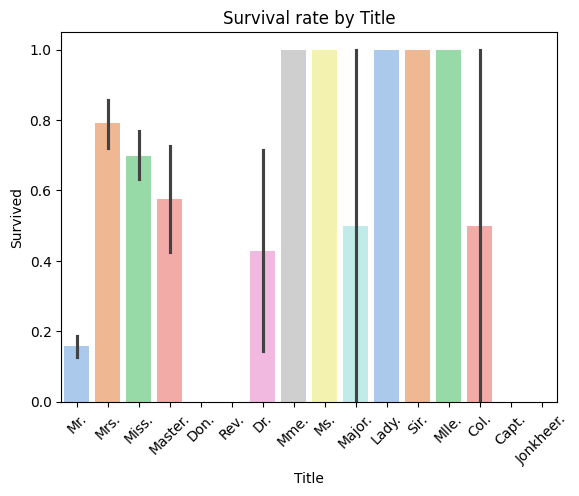

In [23]:
#Create a column Title extracted from names. Then calculate survival rate by title.

data["Title"] = data["Name"].str.extract(r',\s*(\w+\.)')        #(r',\s*(\w+\.)'):This is a regular expression (regex) used with str.extract() to pull out the title (like Mr., Mrs., Dr.) from the Name column in the  dataset.
Survival_rate = data.groupby("Title")["Survived"].mean()*100
Survival_rate
sns.barplot(data=data ,x="Title" , y = "Survived",hue="Title" ,palette="pastel",legend=False )
plt.title("Survival rate by Title")         #hue enable proper palette usage
plt.xticks(rotation=45)
plt.show()

In [37]:
#Who were the top 5 oldest passengers who did not survive?

old_passengers = data[data["Survived"] == 0]
old_passengers_not_survive = old_passengers.sort_values(by="Age" , ascending = False).head(5)
old_passengers_not_survive[["Name","Age","Sex","Pclass"]]

,Name,Age,Sex,Pclass
851,"Svensson, Mr. Johan",74.0,male,3
96,"Goldschmidt, Mr. George B",71.0,male,1
493,"Artagaveytia, Mr. Ramon",71.0,male,1
116,"Connors, Mr. Patrick",70.5,male,3
745,"Crosby, Capt. Edward Gifford",70.0,male,1


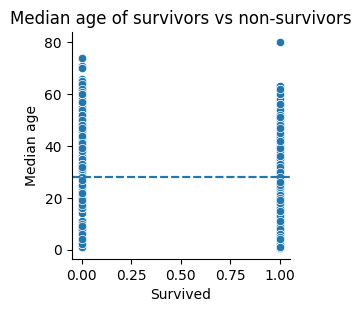

In [52]:
#What’s the median age of survivors vs. non-survivors?

median_age = data.groupby("Survived")["Age"].median()
sns.relplot(data=data , x="Survived", y ="Age",kind="scatter",height=3)
plt.title("Median age of survivors vs non-survivors")
for s, m in median_age.items():        #item: it iterate to all value
    plt.axhline(m, linestyle='--', label=f"Median Age for Survived={s}")

plt.ylabel("Median age")
plt.show()


Passenger class with the most children: 3


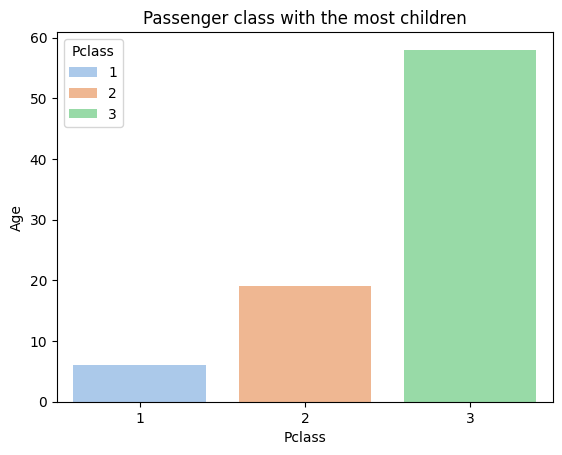

In [67]:
#Which passenger class had the highest number of children (age < 16)?
children = data[data["Age"]<16]
pclass = children["Pclass"].value_counts()
print("\nPassenger class with the most children:", pclass.idxmax())
sns.countplot(data=children , x="Pclass",hue="Pclass",palette="pastel")
plt.title("Passenger class with the most children")
plt.ylabel("Age")
plt.show()

In [71]:
#Find all passengers whose names contain the word 'the' (case-insensitive).

case_sensitive = data[data["Name"].str.contains(r'\bthe\b', case = False , na = False)]
case_sensitive     
#na avoid error if there is NaN value
#\b means boundary so it did not count word like theodore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Survival_rate
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,NaN,NaN


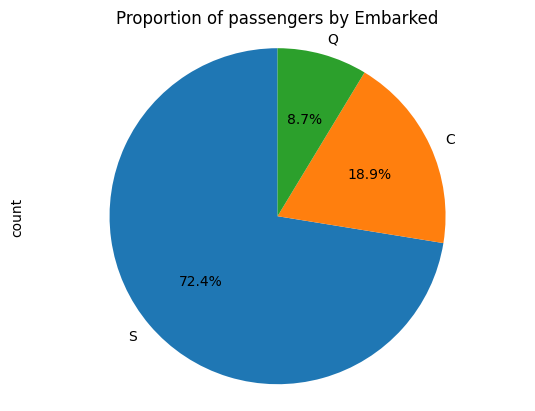

<Figure size 200x200 with 0 Axes>

In [84]:
#Create a pie chart of the proportion of passengers by Embarked.

proportion = data["Embarked"].value_counts()
proportion.plot(kind="pie",autopct="%1.1f%%",startangle=90)
plt.title("Proportion of passengers by Embarked")
plt.axis("equal") 
plt.figure(figsize=(2, 2))
plt.show()

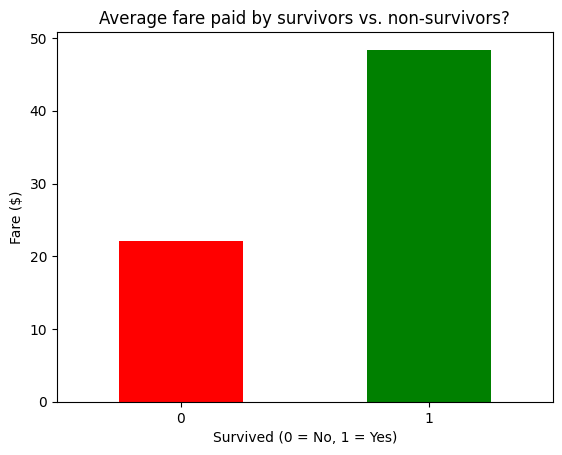

In [91]:
#What was the average fare paid by survivors vs. non-survivors?
avg_fare = data.groupby("Survived")["Fare"].mean()
avg_fare.plot(kind="bar", color= ("red","Green"))
plt.title("Average fare paid by survivors vs. non-survivors?")
plt.ylabel("Fare ($)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.show()

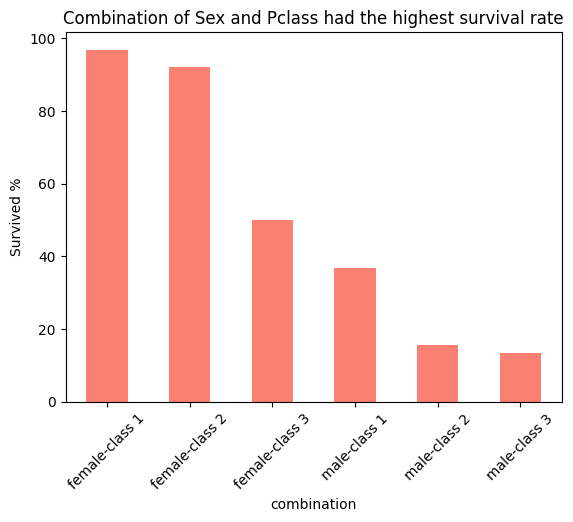

In [105]:
#Which combination of Sex and Pclass had the highest survival rate?
data["combination"] = data["Sex"] +"-class " + data["Pclass"].astype(str)
survival_rate = data.groupby("combination")["Survived"].mean().sort_values(ascending=False)*100
survival_rate.plot(kind="bar",color = "salmon")
plt.title("Combination of Sex and Pclass had the highest survival rate")
plt.ylabel("Survived %")
plt.xticks(rotation=45)
plt.show()